# Digital Signal Processing With Python

### Source: https://pysdr.org/

 * Sample signal generation and FFT (Fast Fourier Transform) practice using Python

In [74]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

# Define sine wave data for plotting
def sin_wave(Hz: int, T, Fs): # T = time // Fs = Sampling Rates
    global t
    t = np.arange(0, T, 1 / Fs)
    result = np.sin(2 * np.pi * Hz * t)
    return result

def noise_wave(Hz: int, T, Fs, noise_level: float): # Make a noise Signal
    t = np.arange(0, T, 1 / Fs)
    clean_signal = np.sin(2 * np.pi * Hz * t)
    noise = noise_level * np.random.randn(len(t))
    return clean_signal + noise

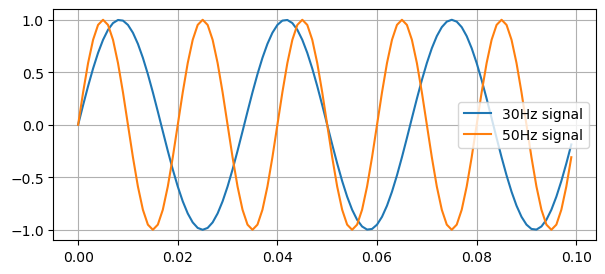

In [146]:
t = [None]
T = 0.1 # Time parameter // Time parameters and FS must match the plot data
Fs = 1000 # Sampling rates
sig_30hz = sin_wave(Hz = 30, T = T, Fs = Fs)
sig_50hz = sin_wave(Hz = 50, T = T, Fs = Fs)
sig_noise = noise_wave(Hz = 30, T = T, Fs = Fs, noise_level = 0.4)

#sig_50hz = sig_50hz + sig_noise

plt.figure(figsize=(7, 3))
plt.plot(t, sig_30hz)
plt.plot(t, sig_50hz)
plt.legend(['30Hz signal', '50Hz signal'])
plt.grid(True)
plt.show()

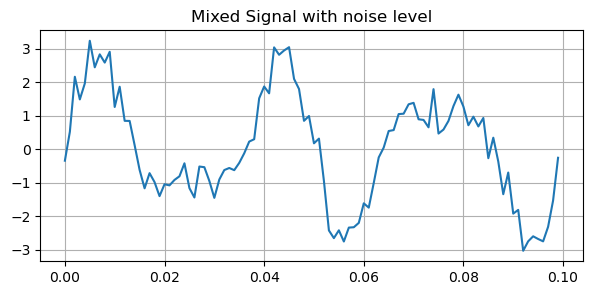

In [136]:
sig_mixed = sig_30hz + sig_50hz + sig_noise
plt.figure(figsize=(7, 3))
plt.plot(t, sig_mixed)
plt.title('Mixed Signal with noise level')
plt.grid(True)
plt.show()

----------
* Converting from the Time Domain to the Frequency Domain using FFT

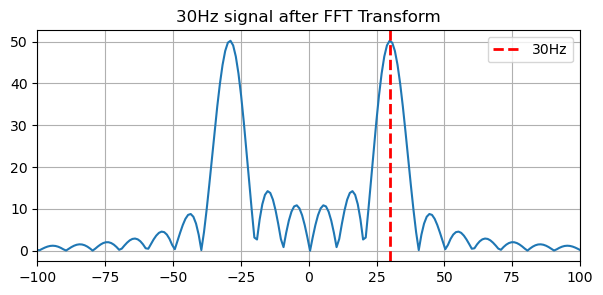

In [137]:
def FFT_pack(s: np.ndarray, Fs, N = 2**7) -> all: # Return Magnitude / Phase / Frequency
    # N = FFT size
    S = np.fft.fftshift(np.fft.fft(s, n=N))
    s_mag = np.abs(S)
    s_phase = np.angle(S)
    f = np.linspace(-Fs/2, Fs/2, N)
    return s_mag, s_phase, f

s_mag, s_phase, f = FFT_pack(sig_30hz, Fs = Fs, N = 2**10)

plt.figure(figsize=(7, 3))
plt.plot(f, s_mag)
plt.xlim(-100, 100)
plt.axvline(30, color='r', linestyle='--', linewidth=2, label='30Hz')
plt.title('30Hz signal after FFT Transform')
plt.legend()
plt.grid(True)
plt.show()

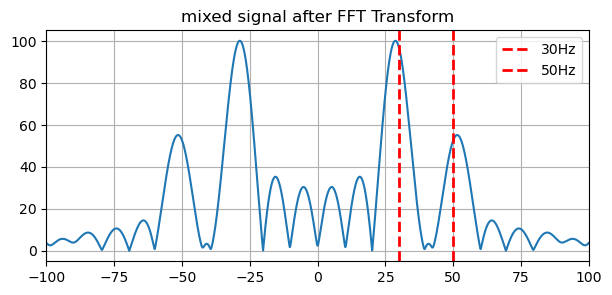

In [141]:
s_mag, s_phase, f = FFT_pack(sig_mixed, Fs = Fs, N = 2**17)

plt.figure(figsize=(7, 3))
plt.plot(f, s_mag)
plt.xlim(-100, 100)
plt.axvline(30, color='r', linestyle='--', linewidth=2, label='30Hz')
plt.axvline(50, color='r', linestyle='--', linewidth=2, label='50Hz')
plt.title('mixed signal after FFT Transform')
plt.legend()
plt.grid(True)
plt.show()

As we can see, by performing an FFT we can determine the individual signals contained within the mixed signal.

Ultimately, the FFT enables us to transform a time-domain signal into its frequency-domain representation.

-------------
## Windowing

Why Using Window?

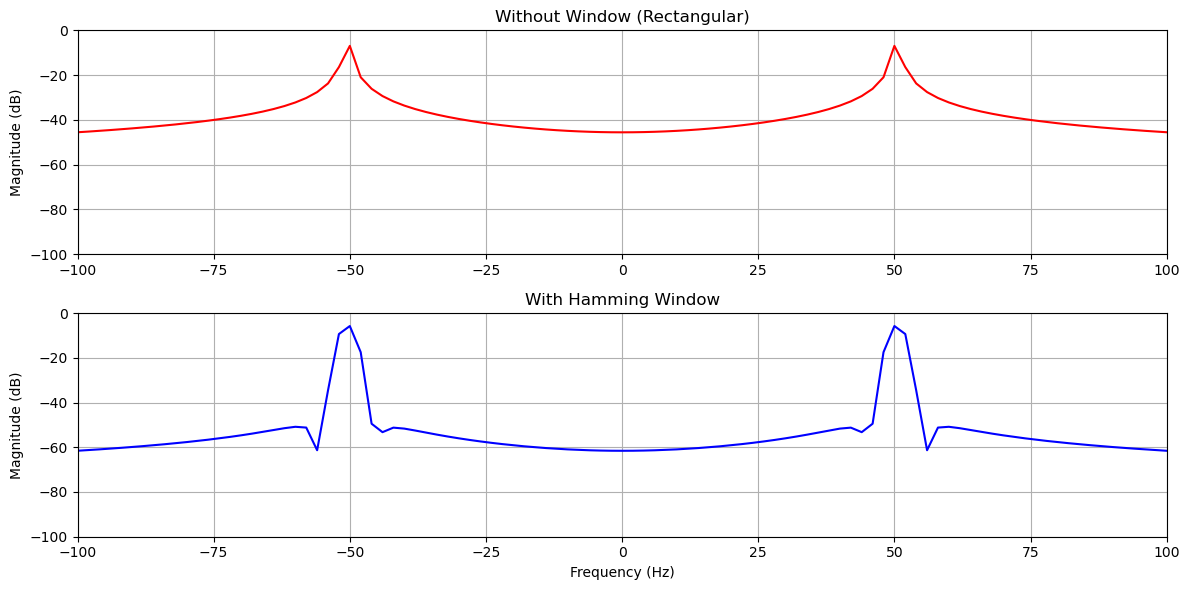

In [143]:
import numpy as np
import matplotlib.pyplot as plt

Fs = 1000
T = 0.5
t = np.arange(0, T, 1/Fs)

f = 50.5
s = np.sin(2 * np.pi * f * t)

N = len(s)
k = np.fft.fftfreq(N, 1/Fs)
k = np.fft.fftshift(k)

fft_rect = np.fft.fft(s)
fft_rect = np.fft.fftshift(fft_rect)
mag_rect = 20 * np.log10(np.abs(fft_rect) / N + 1e-12)

window = np.hamming(N)
s_win = s * window
fft_win = np.fft.fft(s_win)
fft_win = np.fft.fftshift(fft_win)
mag_win = 20 * np.log10(np.abs(fft_win) / (N/2) + 1e-12)

plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(k, mag_rect, 'r')
plt.title('Without Window (Rectangular)')
plt.ylabel('Magnitude (dB)')
plt.xlim(-100, 100)
plt.ylim(-100, 0)
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(k, mag_win, 'b')
plt.title('With Hamming Window')
plt.ylabel('Magnitude (dB)')
plt.xlabel('Frequency (Hz)')
plt.xlim(-100, 100)
plt.ylim(-100, 0)
plt.grid(True)

plt.tight_layout()
plt.show()

As we can see from the plot, the signal with windowing appears more clearly.

<Figure size 640x480 with 0 Axes>

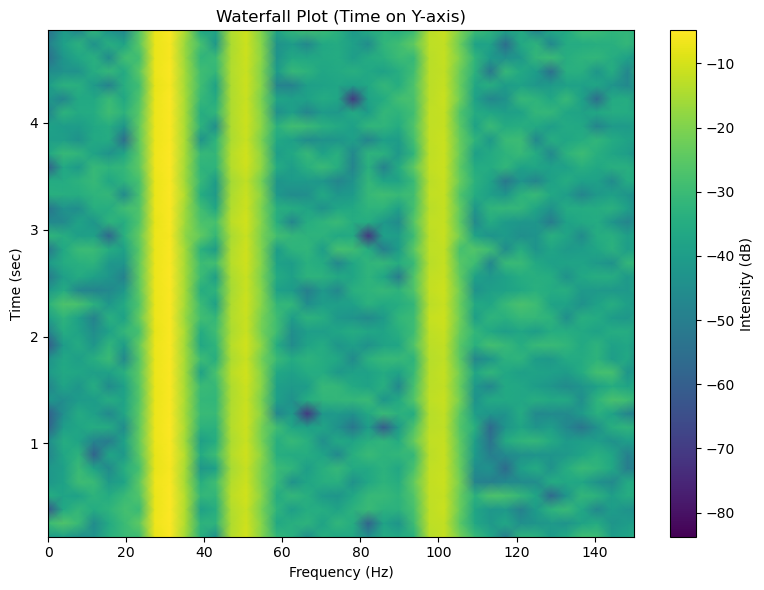

In [160]:
T = 5

sig_30hz = sin_wave(Hz = 30, T = T, Fs = Fs)
sig_50hz = sin_wave(Hz = 50, T = T, Fs = Fs)
sig_100hz = sin_wave(Hz = 100, T = T, Fs = Fs)
sig_noise = noise_wave(Hz = 30, T = T, Fs = Fs, noise_level = 0.4)

full_signal = sig_30hz + sig_50hz + sig_100hz + sig_noise

Pxx, freqs, bins, im = plt.specgram(full_signal, Fs=Fs, NFFT=256, noverlap=128)
plt.clf()

plt.figure(figsize=(8, 6))
plt.pcolormesh(freqs, bins, 10 * np.log10(Pxx.T), shading='gouraud')

plt.xlim(0, 150)

plt.xlabel('Frequency (Hz)')
plt.ylabel('Time (sec)')
plt.title('Waterfall Plot (Time on Y-axis)')
plt.colorbar(label='Intensity (dB)')
plt.tight_layout()
plt.show()